In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="matplotlib")
from recognizer_voxnet import load_pc, detector_voxnet, voxilize, voxel_scatter
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

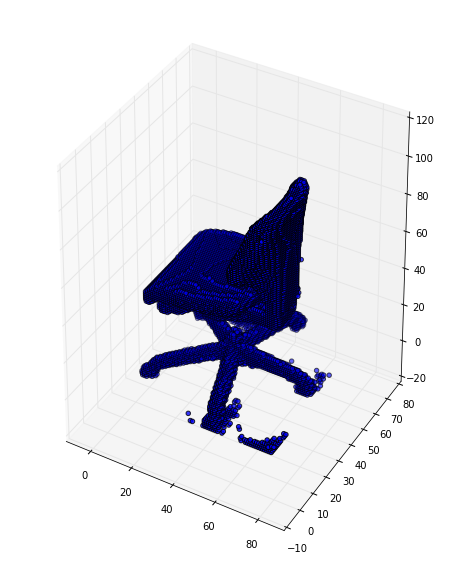

In [5]:
#plot point_cloud
np_pc1 = load_pc("data/chairXYZ.mat")
fig1 = plt.figure(1,figsize=(8, 10))
ax1 = fig1.add_subplot(1,1,1, projection='3d')
ax1.scatter(np_pc1[:,0], np_pc1[:,1], np_pc1[:,2])

In [6]:
#voxelize
tic = time.time()
np_vox1 = voxilize(np_pc1)
tictoc = time.time() - tic
print("Plot1: Voxelizing took {0:.4f}sec for {1} points".format(tictoc, np_pc1.shape[0]))

Plot1: Voxelizing took 0.0456sec for 23534 points


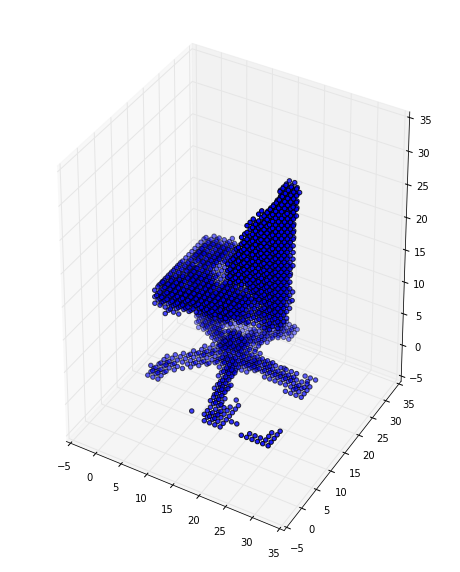

In [7]:
#turn
vox_scat1 = voxel_scatter(np_vox1)
fig2 = plt.figure(2,figsize=(8, 10))
ax1 = fig2.add_subplot(1,1,1, projection='3d')
ax1.scatter(vox_scat1[:,0], vox_scat1[:,1], vox_scat1[:,2])
plt.draw()

In [8]:
tic = time.time()
obj_det = detector_voxnet("data/weights_modelnet40_acc0-8234_2016-5-20-3-47.h5")
tictoc = time.time() - tic
print("loading the Detector took {0:.4f}sec".format(tictoc))

tic = time.time()
label1, proba1 = obj_det.predict(X_pred=np_vox1)
tictoc = time.time() - tic
print("Plot1: Detection took {0:.4f}sec".format(tictoc))
print("plot1: A " + label1 + " was detected with {0:.2f}% certainty".format(proba1 * 100) )

DEBUG:root:Layer1:Conv3D shape=(None, 32, 14, 14, 14)
DEBUG:root:Layer3:Conv3D shape=(None, 32, 12, 12, 12)
DEBUG:root:Layer4:MaxPool3D shape=(None, 32, 6, 6, 6)
DEBUG:root:Layer5:Flatten shape=(None, 6912)
DEBUG:root:Layer6:Dense shape=(None, 128)
DEBUG:root:Layer8:Dense shape=(None, 39)
INFO:root:Model compiled!
INFO:root:Loading model weights from file 'data/weights_modelnet40_acc0-8234_2016-5-20-3-47.h5'
loading the Detector took 0.7758sec
Plot1: Detection took 15.5525sec
plot1: A chair was detected with 99.96% certainty
